# **Coursera - Machine Learning Specilaization, University of Washington**
## Course 1 - Machine Learning Foundations: A Case Study Approach

# Week 2

In [ ]:
pip install turicreate

     |████████████████████████████████| 91.9MB 62kB/s 
     |████████████████████████████████| 3.4MB 44.1MB/s 
     |████████████████████████████████| 327kB 39.2MB/s 
     |████████████████████████████████| 86.3MB 45kB/s 
     |████████████████████████████████| 51kB 5.4MB/s 
     |████████████████████████████████| 3.8MB 41.0MB/s 
     |████████████████████████████████| 450kB 41.4MB/s 
  Created wheel for resampy: filename=resampy-0.2.1-cp36-none-any.whl size=320850 sha256=c9dc8fb51a30b2b00da02e1f4037e9ac66dc4a04d9c87c553b8832f4c1c3beb1
  Stored in directory: /root/.cache/pip/wheels/ff/4f/ed/2e6c676c23efe5394bb40ade50662e90eb46e29b48324c5f9b
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=051f088309aefd68e4935f6860b4b7c151060c1608968770196ba232074870dd
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built resampy gast
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, 

### Machine Learning - It mimics learning process of humans

### Types of Machine Learning
- Supervised Learning - Data is labelled. Supervised learning is further classified as **Classification** and **Regression**
>Linear Regression, Logistic Regression, Support Vector Machine, KNN, Neural Networks
- Unsupervised Learning - Data is not labelled. Unsupervised learning is further classified as **Clustering** and **Association**
> K-MEANS, C-MEANS, HCA(Hierarchical Cluster Analysis), Apriori
- Reinforcement - Machine learns based on rewards and penalties
> Q Learning, Sarsa

### Predicting House Prices
- To fit the curve to the data we use RSS(Residual Sum of Squares)
- Higher Order curves are called as Overfitting

###How to choose model order/complexity
- Want good predictions, but can't observe future
- Simulate predictions
>1. Remove some houses
>2. Fit model on remaining
>3. Predict heldout houses

###Terminology
- Training/test split - The data to be fitted to our model
- Training Error - The RSS(Residual Sum of Squares) on our dataset
- Test Error - The RSS(Residual Sum of Squares) of eleminated data on our dataset
- Training/Test Curves - The plot of Model Complexity vs Error(Increasing the Model complexity Error will decreases in Training Error. But for Test Error the curve will decrease and at some point it starts to increase again)
- Feature Extraction - The process of extracting the required data from our dataset

###The Machine Learning Pipeline
> **Data -> ML Method -> Intelligence**

###Predicting house prices

####Import the data and extract the zip

In [ ]:
pip install zipfile36

In [ ]:
import zipfile

target = '/content/home_data.zip'
handle = zipfile.ZipFile(target)
handle.extractall('/content/home_data.sframe')
handle.close()


####Load some house sales data

In [ ]:
import turicreate

sales = turicreate.SFrame('/content/home_data.sframe/home_data.sframe')

####Exploring the data for house sales

In [ ]:
sales #Display the data in dataset

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900.0,3.0,1.0,1180.0,5650.0,1.0,0
6414100192,2014-12-09 00:00:00+00:00,538000.0,3.0,2.25,2570.0,7242.0,2.0,0
5631500400,2015-02-25 00:00:00+00:00,180000.0,2.0,1.0,770.0,10000.0,1.0,0
2487200875,2014-12-09 00:00:00+00:00,604000.0,4.0,3.0,1960.0,5000.0,1.0,0
1954400510,2015-02-18 00:00:00+00:00,510000.0,3.0,2.0,1680.0,8080.0,1.0,0
7237550310,2014-05-12 00:00:00+00:00,1225000.0,4.0,4.5,5420.0,101930.0,1.0,0
1321400060,2014-06-27 00:00:00+00:00,257500.0,3.0,2.25,1715.0,6819.0,2.0,0
2008000270,2015-01-15 00:00:00+00:00,291850.0,3.0,1.5,1060.0,9711.0,1.0,0
2414600126,2015-04-15 00:00:00+00:00,229500.0,3.0,1.0,1780.0,7470.0,1.0,0
3793500160,2015-03-12 00:00:00+00:00,323000.0,3.0,2.5,1890.0,6560.0,2.0,0


In [ ]:
sales.show() #Pictorial representation of data

Materializing SFrame

Warning: Skipping column 'date'. Unable to show columns of type 'datetime'; only [int, float, str] can be shown.

Further warnings of unsupported type will be suppressed.

In [ ]:
sales['price'].show()

Materializing SArray

####Scatter Plot Visualization

In [24]:
sales_visual = turicreate.visualization.scatter(sales["sqft_living"], sales["price"],"sqft_living","price")
#The first two parameters are the data for x and y axis and next two parameters are labels for x and y axis


#sales.show(view = "Scatter Plot", x = ['sqft_living'], y = ["price"])

In [21]:
sales_visual

####Splitting the data into training and test sets
> Creating a simple regression model of sqft_living to price

In [23]:
train_data, test_data = sales.random_split(0.8,seed = 0)
#Parameter 0.8 represents that 80% of data will be going to train_data and remaining for test_data
#seed is used to get almost the same result after random split

####Building the Regression Model

In [30]:
sqft_model = turicreate.linear_regression.create(train_data,target = 'price',features = ['sqft_living'])
#Turicreates's linear regression uses a particular algorithm called Newton's Method by default
#The first parameter is our input data, the second parameter is price which is our target and third parameter is the feature that we are extracting(In this case sqft_living)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.015254     | 4345561.717953     | 2156254.928547       | 263102.752160                   | 259910.430008                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [34]:
sqft_model

Class                          : LinearRegression

Schema
------
Number of coefficients         : 2
Number of examples             : 16514
Number of feature columns      : 1
Number of unpacked features    : 1

Hyperparameters
---------------
L1 penalty                     : 0.0
L2 penalty                     : 0.01

Training Summary
----------------
Solver                         : newton
Solver iterations              : 1
Solver status                  : SUCCESS: Optimal solution found.
Training time (sec)            : 0.0235

Settings
--------
Residual sum of squares        : 1143149583019287.2
Training RMSE                  : 263102.7522

Highest Positive Coefficients
-----------------------------
sqft_living                    : 282.3363

Lowest Negative Coefficients
----------------------------
(intercept)                    : -47714.1046

####Evaluating the simple model

In [37]:
test_data['price'].mean() #Prints the mean value of the price column from test_data dataset

543054.0425632533

In [39]:
sqft_model.evaluate(test_data)  #It evaluated the trained sqft_model with parameter test_data to evaluate and this returns RMSE and Maximum Error

{'max_error': 4140408.120875762, 'rmse': 255197.02222251074}

####Output of our Predictions

In [44]:
#We are using Matplotlib to visualize our prediction
import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib inlin - prints the output in notebook itself, which is similar to  turicreate.canvas.set_target('ipynp') 

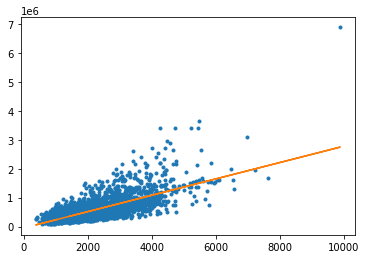

In [48]:
plt.plot(test_data['sqft_living'],test_data['price'],'.',test_data['sqft_living'],sqft_model.predict(test_data),'-')
#The first two parameters are X and Y axis plot and . represents one more graph overlapping and next two parameters are X and Y axis values

####Inspecting the model coefficients learned

In [51]:
sqft_model.coefficients

name,index,value,stderr
(intercept),None,-47714.104626446846,5048.36677442308
sqft_living,None,282.3362976492098,2.21868613558673


####Exploring other features of the data

In [53]:
my_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']
sales[my_features].show()

Materializing SFrame

####Boxwhisker Plot

In [55]:
sales_visual_boxwhisker = turicreate.visualization.box_plot(x = sales['zipcode'],y = sales['price'])

In [56]:
sales_visual_boxwhisker

####Build a regression model with more features

In [58]:
#Training the model with more features
my_features_model = turicreate.linear_regression.create(train_data,target = 'price', features = my_features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 75

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.034238     | 4083110.965377     | 1315906.131918       | 190417.124772                   | 165351.190762                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [60]:
my_features #These are the features added to train

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [62]:
print(sqft_model.evaluate(test_data))  #Evaluating the model without features
print(my_features_model.evaluate(test_data)) #Evaluating the model with features

{'max_error': 4140408.120875762, 'rmse': 255197.02222251074}
{'max_error': 3190339.0697868494, 'rmse': 180534.69399731315}


####Apply learned models to predict prices of 3 different houses

In [63]:
house1 = sales[sales['id'] == '5309101200'] #Creating house1 with a particular house_id

In [65]:
house1  #Details of house1

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: 1

Data:
+------------+---------------------------+----------+----------+-----------+
|     id     |            date           |  price   | bedrooms | bathrooms |
+------------+---------------------------+----------+----------+-----------+
| 5309101200 | 2014-06-05 00:00:00+00:00 | 620000.0 |   4.0    |    2.25   |
+------------+---------------------------+----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    2400.0   |  5350.0  |  1.5   |     0      |  0   |     4     |  7.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------------+
|   1460.0   |     940.0     |  1929.0  |     0.0      |  98117  | 47.67632376 |
+------------+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.37010126 |     1250.0    | ... |
+---------------+---------------+-----+
[1 rows x 21 columns]

####Adding images on Notebook

In [66]:
target = '/content/house_images.zip'
handle = zipfile.ZipFile(target)
handle.extractall('/content/house_images')
handle.close()

<img src="/content/house_images/house_images/house1.png">

####Predicting the price of House1

In [68]:
house1['price'] #Actual price of the house

dtype: float
Rows: 1
[620000.0]

In [72]:
sqft_model.predict(house1)  #Predicted price of the house without features

dtype: float
Rows: 1
[629893.0097316568]

In [73]:
my_features_model.predict(house1) #Predicted price of the house with features

dtype: float
Rows: 1
[727120.5248675715]

#### Predicting the price of House2

<img src = "/content/house_images/house_images/house2.jpg">

In [74]:
house2 = sales[sales['id'] == '1925069082']

In [75]:
house2

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+-----------+----------+-----------+
|     id     |            date           |   price   | bedrooms | bathrooms |
+------------+---------------------------+-----------+----------+-----------+
| 1925069082 | 2015-05-11 00:00:00+00:00 | 2200000.0 |   5.0    |    4.25   |
+------------+---------------------------+-----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    4640.0   | 22703.0  |  2.0   |     1      |  4   |     5     |  8.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------------+
|   2860.0   |     1780.0    |  1952.0  |     0.0      |  98052  | 47.63925783 |
+------------+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.09722322 |     3140.0    | ... |
+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

In [76]:
house2['price']

dtype: float
Rows: 1
[2200000.0]

In [77]:
sqft_model.predict(house2)

dtype: float
Rows: 1
[1262326.3164658868]

In [78]:
my_features_model.predict(house2)

dtype: float
Rows: 1
[1231569.1412826823]

####Predicting the price of Bill Gate's House

In [82]:
billgates_house = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

In [85]:
sqft_model.predict(turicreate.SFrame(billgates_house))

dtype: float
Rows: 1
[14069100.777834045]

In [86]:
my_features_model.predict(turicreate.SFrame(billgates_house))

dtype: float
Rows: 1
[14980552.580657601]